# libraries Used

In [115]:
!pip uninstall -y sklearn
!pip install -U scikit-learn
import pandas as pd
import seaborn as sns
import string
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
import pickle

# Data Preprocessing

In [63]:
url = "https://drive.google.com/file/d/1WWL6D0nBYBybIBd_tQkGf4FhAVp3x5Ul/view?usp=sharing"
import pandas as pd
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
df = pd.read_csv(download_url)
print(df.head())
print("\n",df.tail())

                                              Review  Sentiment
0  Fast shipping but this product is very cheaply...          1
1  This case takes so long to ship and it's not e...          1
2  Good for not droids. Not good for iPhones. You...          1
3  The cable was not compatible between my macboo...          1
4  The case is nice but did not have a glow light...          1

                                                   Review  Sentiment
24995  These cables (lightning) are far superior to m...          5
24996  This unit performs exactly as advertised.  I u...          5
24997  I had the key cut at a local hardware store cu...          5
24998  I love my case I ordered from amazon. It wasn'...          5
24999  Awsome!!! I loved this little speaker. It has ...          5


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [65]:
df.Sentiment.value_counts()

,count
Sentiment,
1,5000
2,5000
3,5000
4,5000
5,5000


In [66]:
df.dropna(inplace=True)

In [67]:
df.loc[df['Sentiment']<=3,'Sentiment'] = 0

In [68]:
df.loc[df['Sentiment']>3,'Sentiment'] = 1

In [69]:
df.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


In [70]:
df.tail()

,Review,Sentiment
24995,These cables (lightning) are far superior to m...,1
24996,This unit performs exactly as advertised. I u...,1
24997,I had the key cut at a local hardware store cu...,1
24998,I love my case I ordered from amazon. It wasn'...,1
24999,Awsome!!! I loved this little speaker. It has ...,1


In [71]:
df['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


<Axes: >

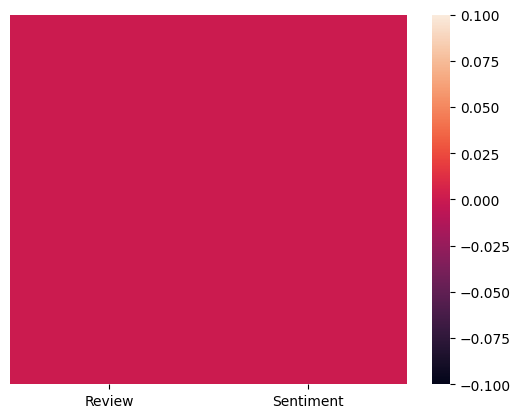

In [72]:
sns.heatmap(df.isnull(),yticklabels=False)

In [73]:
df['lenght'] = df['Review'].apply(len)

In [74]:
df.head()

,Review,Sentiment,lenght
0,Fast shipping but this product is very cheaply...,0,227
1,This case takes so long to ship and it's not e...,0,71
2,Good for not droids. Not good for iPhones. You...,0,146
3,The cable was not compatible between my macboo...,0,122
4,The case is nice but did not have a glow light...,0,112


In [75]:
df.tail()

,Review,Sentiment,lenght
24995,These cables (lightning) are far superior to m...,1,280
24996,This unit performs exactly as advertised. I u...,1,1010
24997,I had the key cut at a local hardware store cu...,1,302
24998,I love my case I ordered from amazon. It wasn'...,1,233
24999,Awsome!!! I loved this little speaker. It has ...,1,122


In [76]:
df['lenght'].max()

15829

In [77]:
df['lenght'].min()

1

In [78]:
print(df[df['lenght']==1]['Review'])

1161     😷
15049    a
15162    1
15978    👍
16929    👍
24799    a
Name: Review, dtype: object


In [79]:
print(df[df['lenght']==df['lenght'].max()]['Review'])

17492    Hello everyone. This is a review about the And...
Name: Review, dtype: object


In [80]:
positive = df[df['Sentiment'] == 1]
print(positive.head())

                                                  Review  Sentiment  lenght
15000  If you have a LifeProof case for your Iphone 4...          1     132
15001  Got the case in the mail in a white envelope, ...          1    1484
15002  Good for the price paid. Battery last for a lo...          1     133
15003                                               good          1       4
15004  It Reads Codes and lets you erase them.  It's ...          1     351


In [81]:
negative = df[df['Sentiment']==0]
print(negative.head())

                                              Review  Sentiment  lenght
0  Fast shipping but this product is very cheaply...          0     227
1  This case takes so long to ship and it's not e...          0      71
2  Good for not droids. Not good for iPhones. You...          0     146
3  The cable was not compatible between my macboo...          0     122
4  The case is nice but did not have a glow light...          0     112


In [82]:
sentence = df['Review'].tolist()
print(sentence[:5])
print(len(sentence))

['Fast shipping but this product is very cheaply made I brought this for my grandchild so her IPod would be protected if it fell but this skin is not suitable for protection. It is only good for decoration. Therefore I rated it1*', "This case takes so long to ship and it's not even worth it DONT BUY!!!!", "Good for not droids. Not good for iPhones. You cannot use all the features of the watch if you have an iPhone because it won't synch to the iPhone", 'The cable was not compatible between my macbook and iphone.  Also the connector came apart and the cables started fraying.', "The case is nice but did not have a glow light. I'm disappointed that the product didn't meet the advertisement."]
24999


In [83]:
sentence_to_string = " ".join(sentence)
print(sentence_to_string)

Output hidden; open in https://colab.research.google.com to view.

In [84]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [85]:
#testing
test = "oh $ I love AI & ML!!!! (By Harsh) "
test_punc_remover = [char for char in test if char not in string.punctuation]
test_puc_remover_join = ''.join(test_punc_remover)
print(test_puc_remover_join)
#Working as expected!

oh  I love AI  ML By Harsh 


In [86]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
test_puc_2 = "I love coding & Machine learning because buliding models is my favorate part"
test_puc_2_clean = [words for words in test_puc_2.split() if words.lower() not in nltk.corpus.stopwords.words('english')]
print(test_puc_2_clean)
# Common words like I and because are removed means it is working smoothly!!!

['love', 'coding', '&', 'Machine', 'learning', 'buliding', 'models', 'favorate', 'part']


# Review Cleaning Pipeline

In [88]:
def review_cleaning(review):
  punch_remover = [char for char in review if char not in string.punctuation]
  puch_remover_join = ''.join(punch_remover)
  cleaned_puch = [words for words in puch_remover_join.split() if words.lower not in nltk.corpus.stopwords.words('english')]
  return cleaned_puch


In [89]:
review_cleanned = df['Review'].apply(review_cleaning)
#working

In [90]:
print(review_cleanned[2])

['Good', 'for', 'not', 'droids', 'Not', 'good', 'for', 'iPhones', 'You', 'cannot', 'use', 'all', 'the', 'features', 'of', 'the', 'watch', 'if', 'you', 'have', 'an', 'iPhone', 'because', 'it', 'wont', 'synch', 'to', 'the', 'iPhone']


In [94]:
vectorizer = CountVectorizer(analyzer = review_cleaning,dtype = np.uint8)
count_vector = vectorizer.fit_transform(df['Review'])

In [96]:
print(count_vector.shape)

(24999, 47282)


In [97]:
print(count_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [98]:
X = pd.DataFrame(count_vector.toarray())
print(X.head())

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   47272  47273  47274  47275  47276  47277  47278  47279  47280  47281  
0      0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0      0  

[5 rows x 47282 columns]


In [99]:
Y = df['Sentiment']

# Training the model

In [100]:
X.shape

(24999, 47282)

In [102]:
Y.shape

(24999,)

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [105]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


# Evaluting Model

<Axes: >

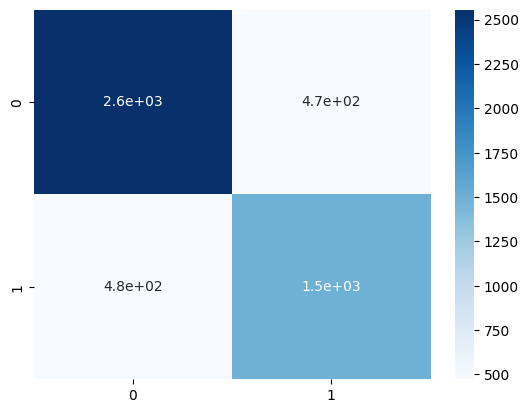

In [112]:
from __future__ import annotations
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot = True, cmap = 'Blues')

In [113]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3029
           1       0.76      0.76      0.76      1971

    accuracy                           0.81      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.81      0.81      0.81      5000



In [114]:
""" Testing on other model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(accuracy_score(y_test,pred))"""

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8166


# Downloading the model

In [116]:
with open("vectorizer.pkl","wb") as f:
  pickle.dump(vectorizer,f)
with open("classifier.pkl","wb") as f:
  pickle.dump(classifier,f)